# Assignment 1 - Data Visualization

In [29]:
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [30]:
df = pd.read_csv('titanic.csv')

In [31]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.shape

(891, 12)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [35]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [37]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
mean_age = df['Age'].mean()
mean_age

29.69911764705882

In [39]:
df['Age'] = df['Age'].fillna(mean_age)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
df = df.drop('Cabin', axis = 1)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [42]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [43]:
df['Age'] = df['Age'].astype('int64')
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

### Visualize Data

In [44]:
plt.style.use('seaborn')

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


#### Single Variable

C:\Users\Awan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


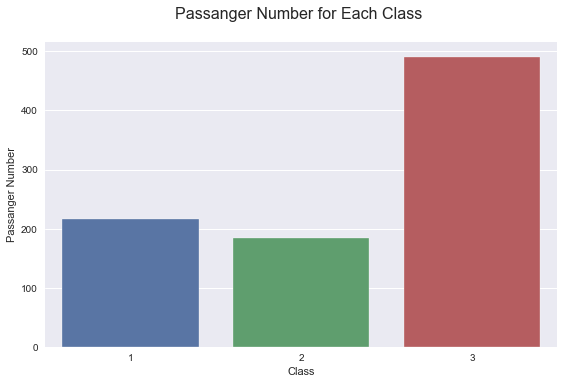

In [46]:
sns.countplot(df['Pclass'])

plt.title('Passanger Number for Each Class \n', fontsize = 16)
plt.xlabel('Class')
plt.ylabel('Passanger Number')

plt.tight_layout()
plt.show()

In [47]:
sex_counts = df['Sex'].value_counts()
sex_counts

male      577
female    314
Name: Sex, dtype: int64

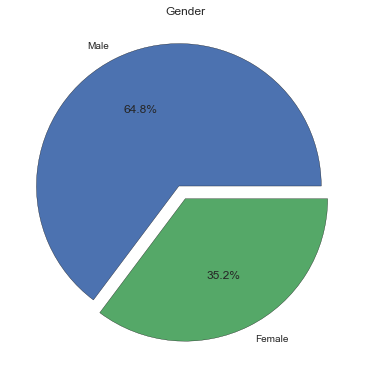

In [48]:
sex_counts = df['Sex'].value_counts()

slices = sex_counts
labels = ['Male', 'Female']
explode = [0.1, 0]

plt.pie(slices, labels=labels, explode=explode, autopct = '%1.1f%%', wedgeprops={'edgecolor': 'black'})

plt.title("Gender")
plt.tight_layout()
plt.show()

C:\Users\Awan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Awan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

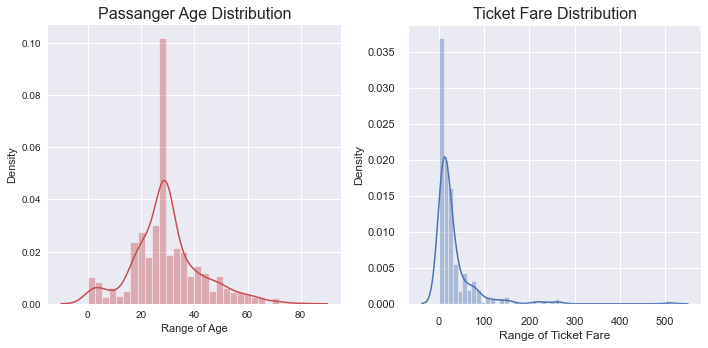

In [49]:
fig, (ax1, ax2) = plt.subplots(figsize=(10,5), nrows=1, ncols=2, sharey = True)

plt.subplot(1, 2, 1)
sns.set()
sns.distplot(df['Age'], color = 'r')
plt.title('Passanger Age Distribution', fontsize = 16)
plt.xlabel('Range of Age')

plt.subplot(1, 2, 2)
sns.set()
sns.distplot(df['Fare'])
plt.title('Ticket Fare Distribution', fontsize = 16)
plt.xlabel('Range of Ticket Fare')

plt.tight_layout()
plt.show

C:\Users\Awan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


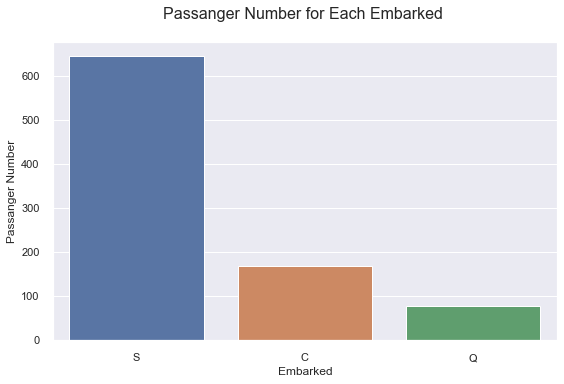

In [50]:
sns.countplot(df['Embarked'])

plt.title('Passanger Number for Each Embarked \n', fontsize = 16)
plt.xlabel('Embarked')
plt.ylabel('Passanger Number')

plt.tight_layout()
plt.show()

#### Dual Variable

<function matplotlib.pyplot.show(close=None, block=None)>

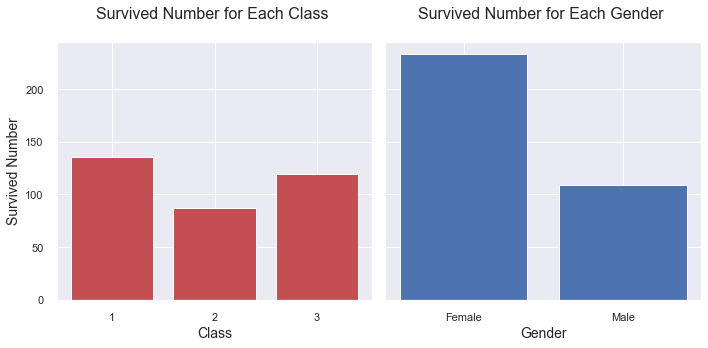

In [51]:
pclass_survived = df.groupby('Pclass')['Survived'].sum()

sex_survived = df.groupby('Sex')['Survived'].sum()

fig, (ax1, ax2) = plt.subplots(figsize=(10,5), nrows=1, ncols=2, sharey = True)

ax1.bar(['1', '2', '3'], pclass_survived, color = 'r')
ax1.set_title('Survived Number for Each Class \n', fontsize=16)
ax1.set_xlabel('Class', fontsize=14)
ax1.set_ylabel('Survived Number', fontsize=14)

ax2.bar(['Female', 'Male'], sex_survived)
ax2.set_title('Survived Number for Each Gender \n', fontsize=16)
ax2.set_xlabel('Gender', fontsize=14)
#ax2.set_ylabel('Survived Number', fontsize=14)

plt.tight_layout()
plt.show

In [55]:
pclass_survived

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

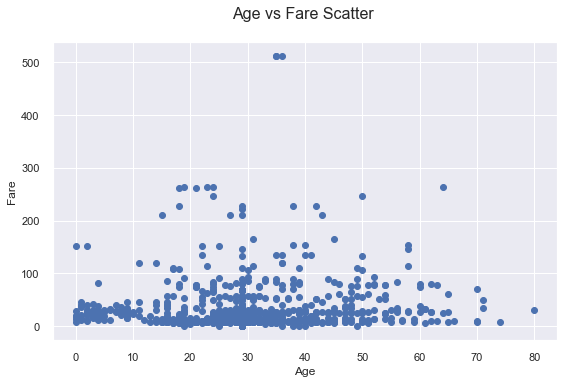

In [124]:
plt.scatter(df['Age'], df['Fare'])

plt.title('Age vs Fare Scatter \n', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.tight_layout()
plt.show()

#### Multi Variable

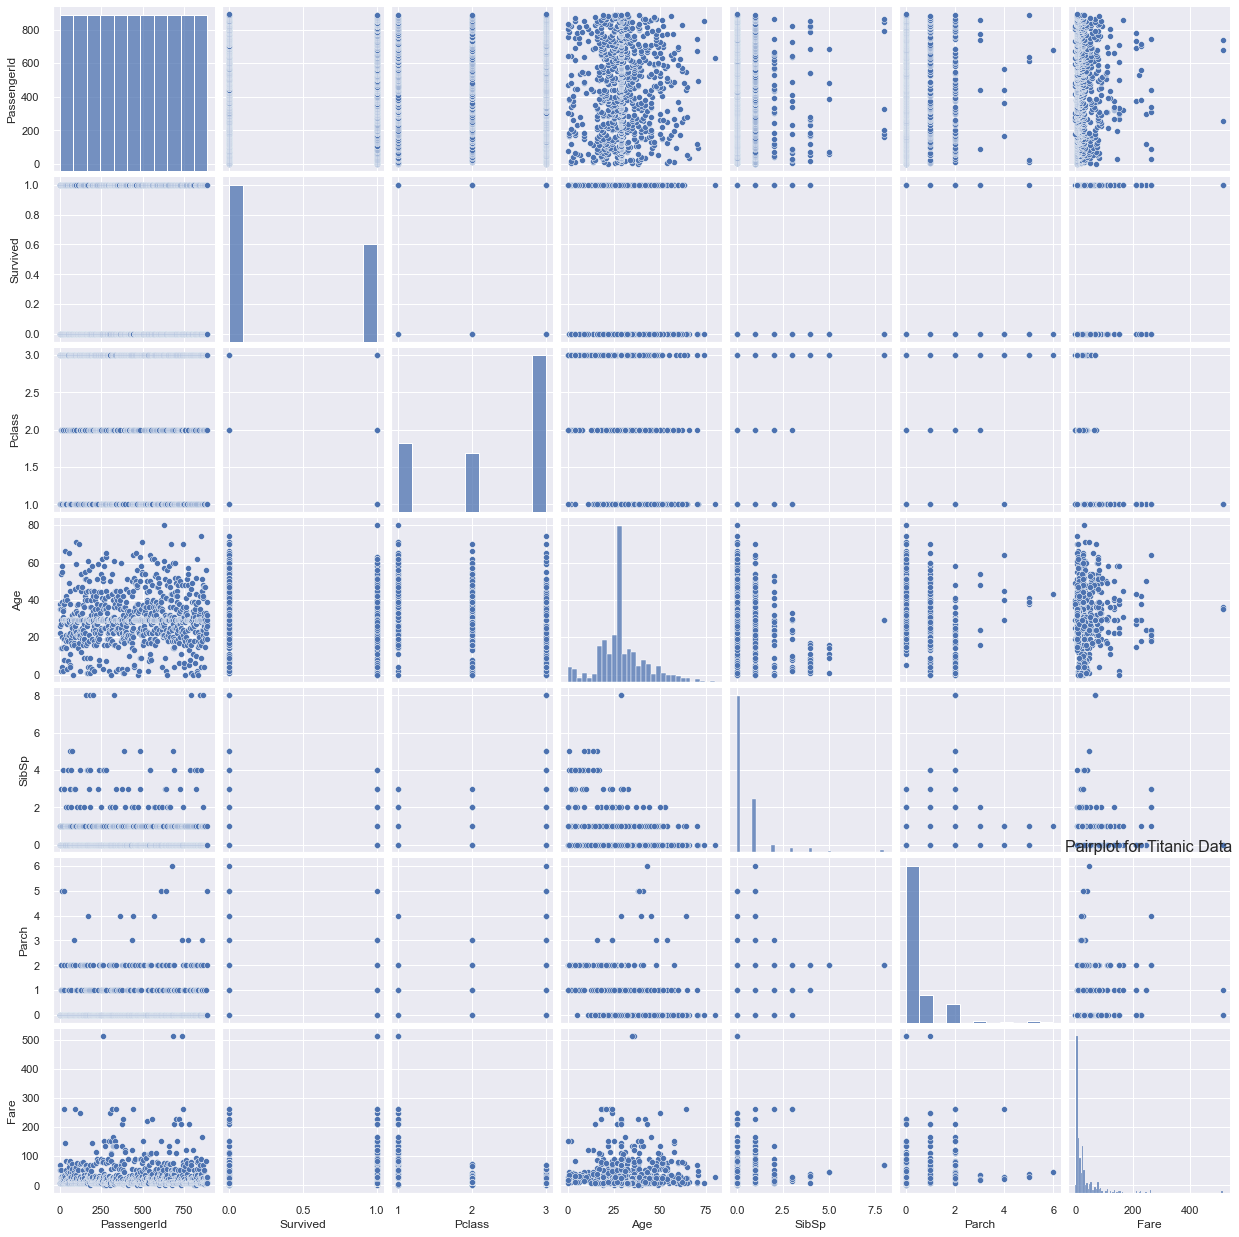

In [126]:
sns.pairplot(df)
plt.title('Pairplot for Titanic Data', fontsize = 16)
plt.show()

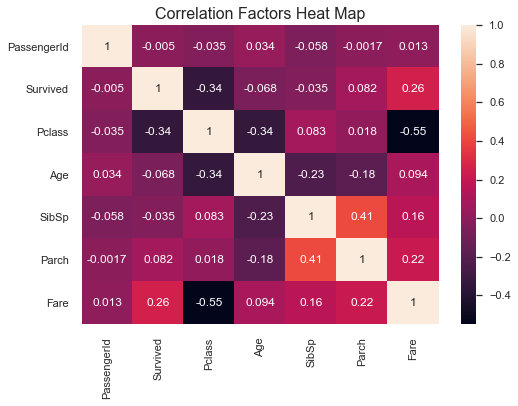

In [127]:
sns.heatmap(data = df.corr(), annot = True).set_title('Correlation Factors Heat Map', size='16')
plt.show()